# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df_approved=df[df['Loan_Status']=='Y']

### 2.1 Credit_History that meet guidlines

In [5]:
#Applicants having a credit history? yes
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

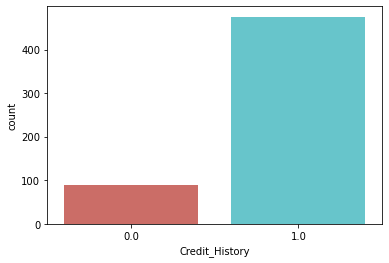

In [6]:
sns.countplot(x='Credit_History',data=df,palette='hls')
plt.show()

<AxesSubplot:ylabel='Credit_History'>

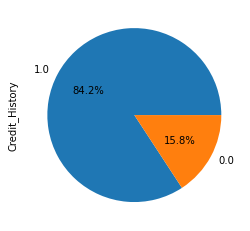

In [22]:
df.Credit_History.value_counts().plot.pie(autopct="%.1f%%")

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [23]:
# Applicants with higher applicant and co-applicant incomes
df_creditcard=df.groupby('Loan_Status')['Credit_History'].sum().reset_index()

In [24]:
df_creditcard

,Loan_Status,Credit_History
0,N,97.0
1,Y,378.0


<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

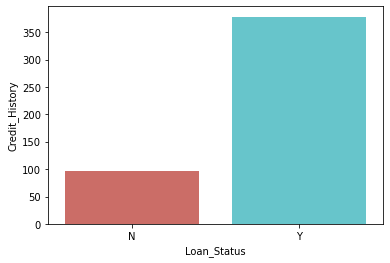

In [25]:
sns.barplot(x='Loan_Status', y='Credit_History',data=df_creditcard,palette='hls')

<AxesSubplot:ylabel='Loan_Status'>

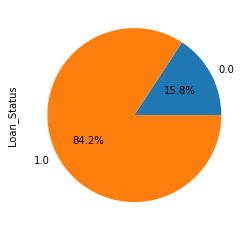

In [26]:
df.groupby('Credit_History')['Loan_Status'].count().plot.pie(autopct="%.1f%%")

* the number of applicatants with credit history that meet the guideline is higher.

### 2.2 Gender

In [27]:
df.groupby('Gender')['Loan_Status'].count()

Gender
Female    112
Male      489
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

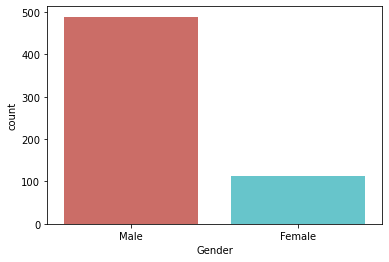

In [28]:
sns.countplot(x="Gender", data=df, palette='hls')

<AxesSubplot:ylabel='Loan_Status'>

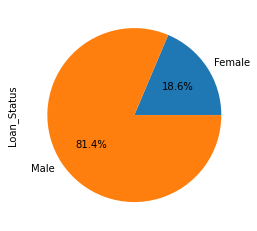

In [29]:
df.groupby('Gender')['Loan_Status'].count().plot.pie(autopct="%.1f%%")

### 2.3 Married

In [13]:
df.groupby('Married')['Loan_Status'].count()

Married
No     213
Yes    398
Name: Loan_Status, dtype: int64

,Married,Loan_Status
0,No,213
1,Yes,398


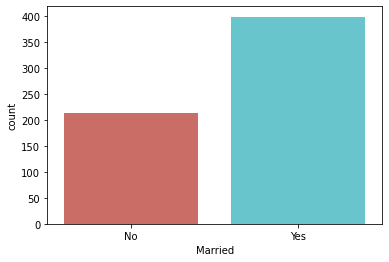

In [8]:
sns.countplot(x='Married',data=df,palette='hls')
plt.show()

<AxesSubplot:ylabel='Loan_Status'>

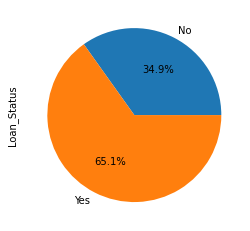

In [14]:
df.groupby('Married')['Loan_Status'].count().plot.pie(autopct="%.1f%%")

### 2.4 Self_Employed

In [ ]:
df.groupby('Self_Employed')['Loan_Status'].count()

Self_Employed
No     500
Yes     82
Name: Loan_Status, dtype: int64

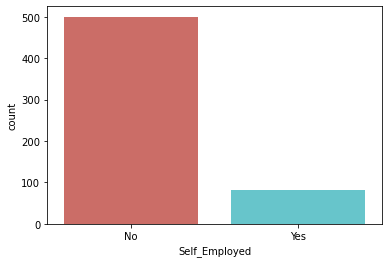

In [ ]:
sns.countplot(x='Self_Employed',data=df,palette='hls')
plt.show()

<AxesSubplot:ylabel='Loan_Status'>

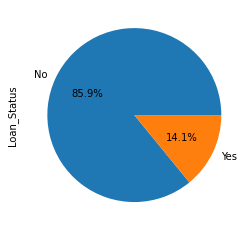

In [ ]:
df.groupby('Self_Employed')['Loan_Status'].count().plot.pie(autopct="%.1f%%")

### 2.5 Property_Area

In [ ]:
# Properties in urban areas with high growth perspectives
df.groupby('Property_Area')['Loan_Status'].count()

Property_Area
Rural        179
Semiurban    233
Urban        202
Name: Loan_Status, dtype: int64

<AxesSubplot:ylabel='Property_Area'>

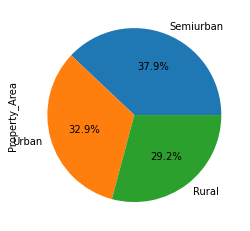

In [ ]:
df.Property_Area.value_counts(dropna=False).plot.pie(autopct="%.1f%%")

### 2.6 Education

In [ ]:
# Applicants with higher education level
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

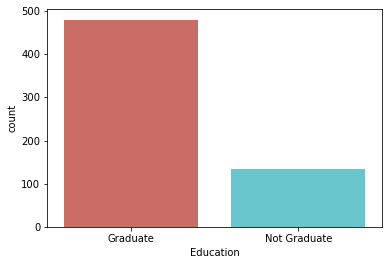

In [ ]:
sns.countplot(x='Education',data=df,palette='hls')


<AxesSubplot:ylabel='Education'>

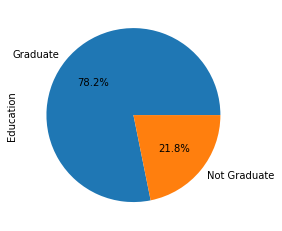

In [ ]:
df.Education.value_counts(dropna=False).plot.pie(autopct="%.1f%%")

### 2.7 Dependents

In [ ]:
df.Dependents.value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

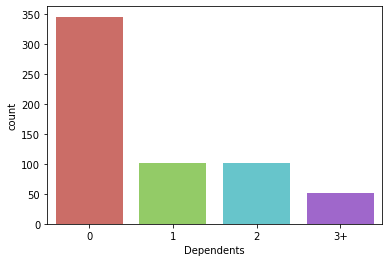

In [ ]:
sns.countplot(x='Dependents',data=df,palette='hls')


<AxesSubplot:ylabel='Dependents'>

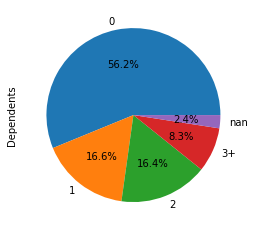

In [ ]:
df.Dependents.value_counts(dropna=False).plot.pie(autopct="%.1f%%")

### 2.8 Loan_Status

In [ ]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

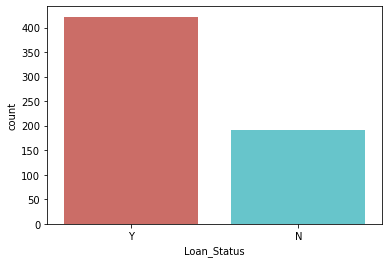

In [ ]:
sns.countplot(x='Loan_Status',data=df,palette='hls')


In [ ]:
df_approved=df[df['Loan_Status']=='Y']

In [ ]:
df_approved.Married.value_counts()

Yes    285
No     134
Name: Married, dtype: int64

In [ ]:
df_approved.Gender.value_counts()

Male      339
Female     75
Name: Gender, dtype: int64

### 2.9 Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



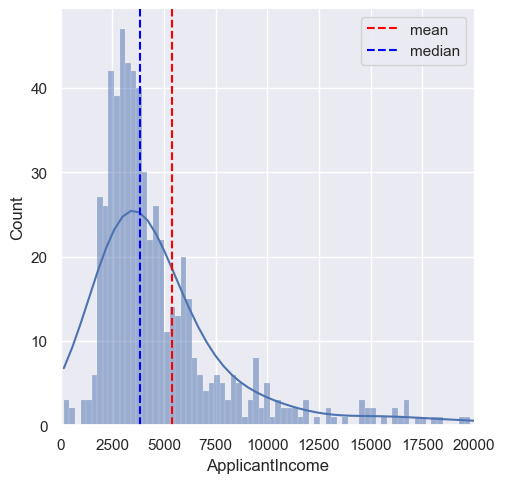

In [ ]:
new=df[['ApplicantIncome','Loan_Status']]
sns.displot(df['ApplicantIncome'],bins=300,kde=True)
plt.xlim(0,20000)
plt.axvline(df['ApplicantIncome'].mean(),color='red',ls='--',label='mean')
plt.axvline(df['ApplicantIncome'].median(),color='blue',ls='--',label='median')
plt.legend()
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

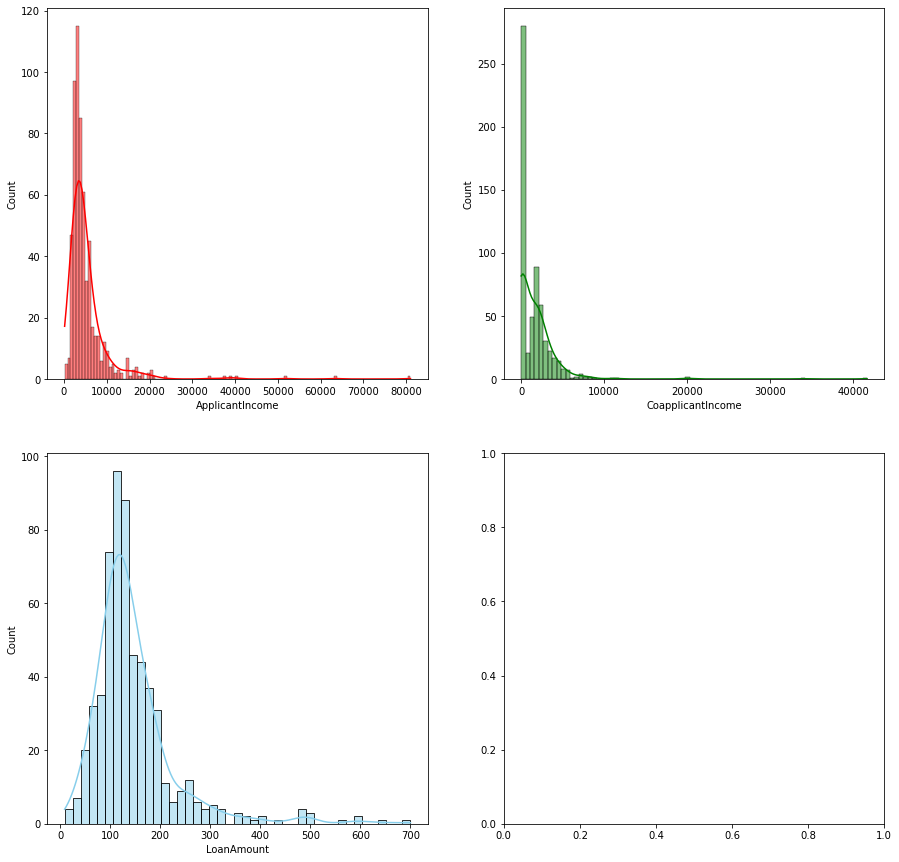

In [22]:
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(15,15))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0],color='red')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1],color='green')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0],color='skyblue')


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='ApplicantIncome'>

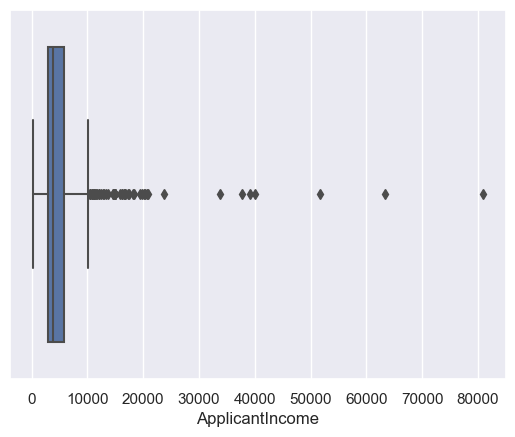

In [ ]:
sns.boxplot(x=df['ApplicantIncome'],data=df)

* ApplicatIncome, CoApplicantIncome and Loan amount all have outliers. They are positively Skewed Distribution(Media<Mean)

### 2.10 Relationship between multiple features

(0.0, 25000.0)

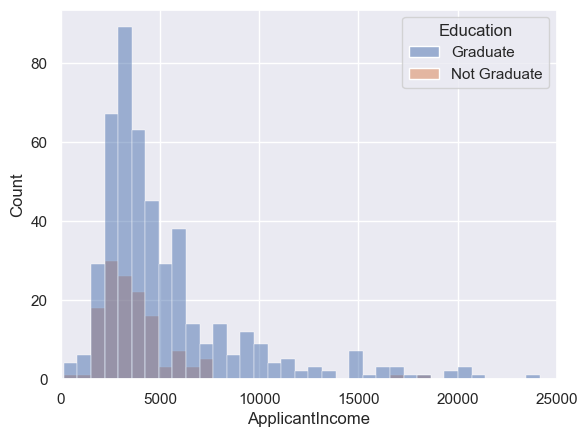

In [ ]:
df.columns
sns.histplot(x='ApplicantIncome',hue='Education',data=df)
plt.xlim(0,25000)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

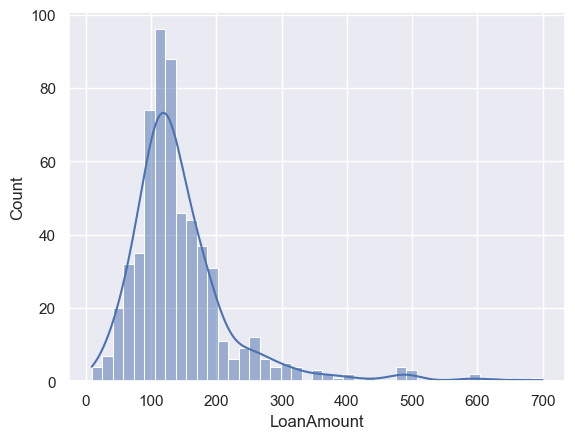

In [ ]:
sns.histplot(x='LoanAmount',data=df,kde=True)

<AxesSubplot:xlabel='LoanAmount'>

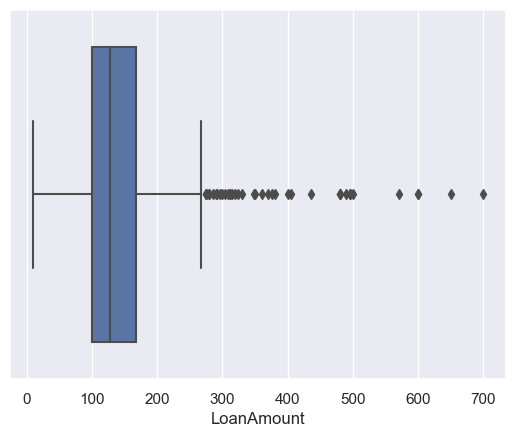

In [ ]:
sns.boxplot(x='LoanAmount',data=df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

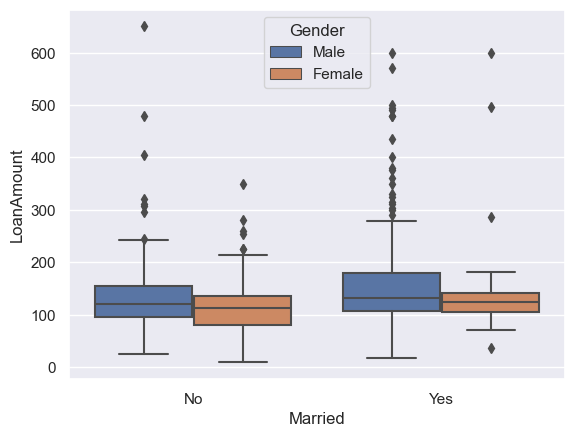

In [ ]:
sns.boxplot(x='Married',y='LoanAmount',hue='Gender',data=df)

In [ ]:
pd.DataFrame.pivot_table(df,values='LoanAmount',columns='Credit_History',index=['Gender','Married'],aggfunc=np.mean)

Credit_History         0.0         1.0
Gender Married                        
Female No       108.416667  114.745763
       Yes      172.250000  156.434783
Male   No       132.842105  131.880000
       Yes      161.212766  151.950943

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

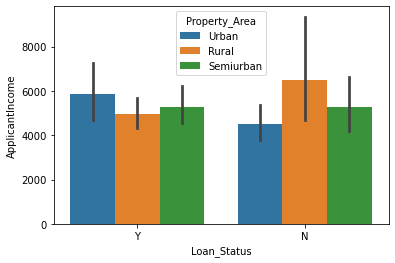

In [48]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Property_Area',data=df)


In [ ]:
#Applicants having a credit history?


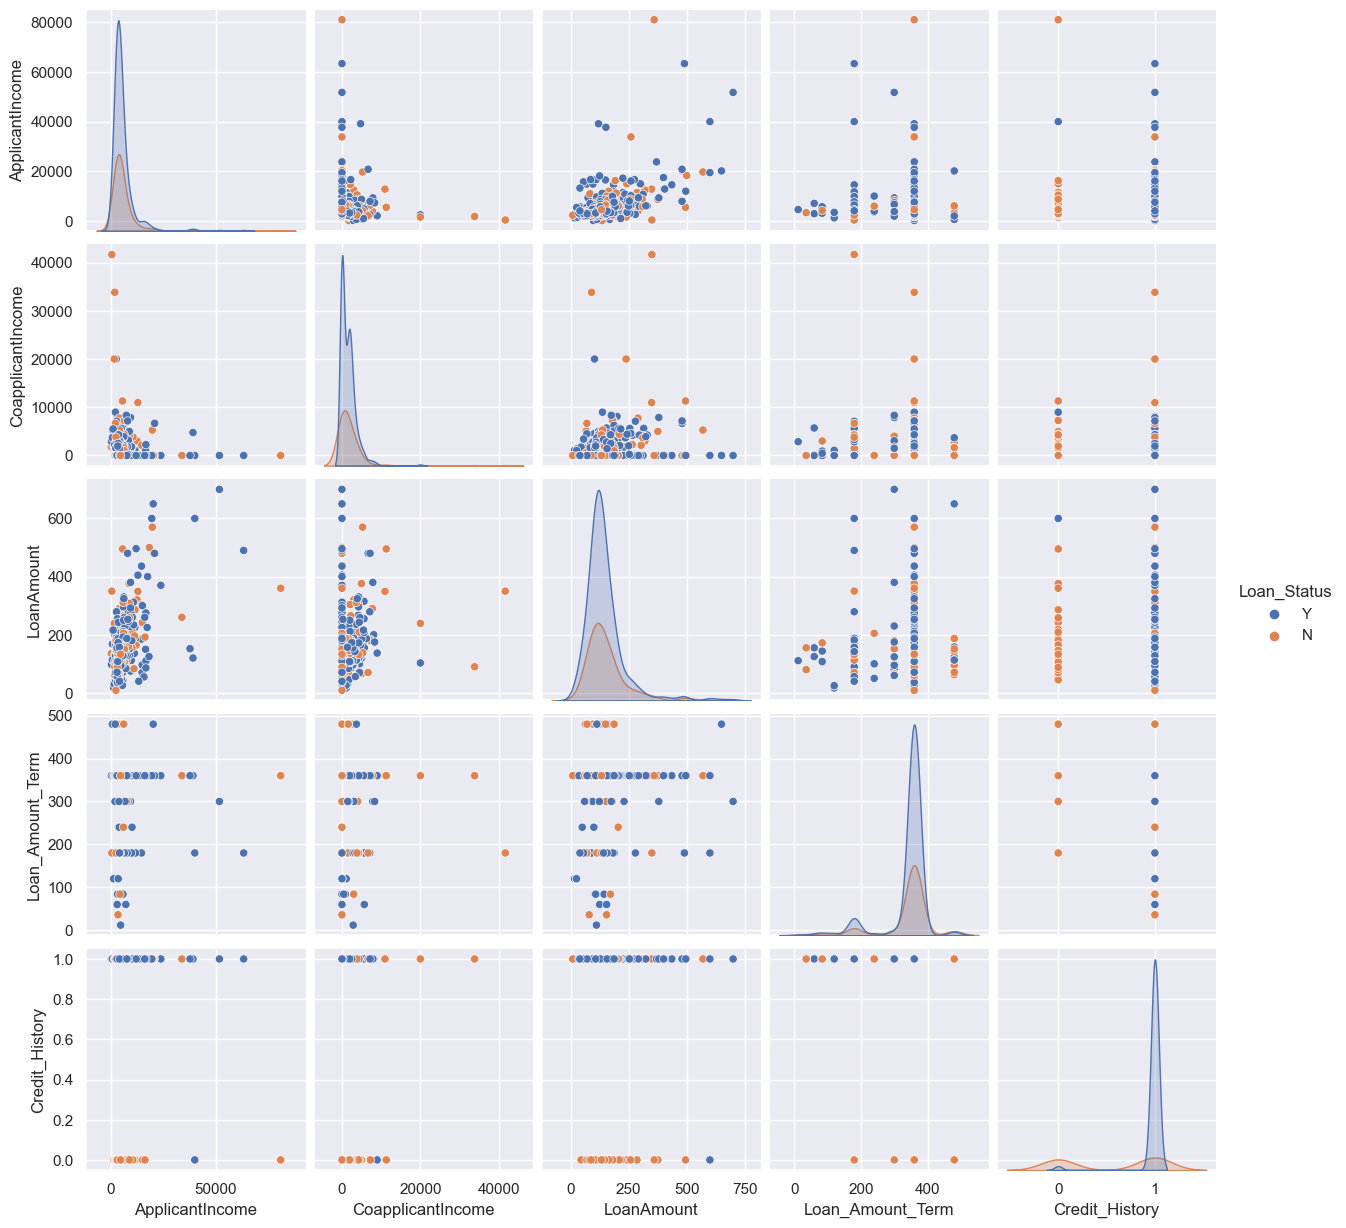

In [ ]:
sns.pairplot(df,hue='Loan_Status')

### 2.11 Correlation

<AxesSubplot:>

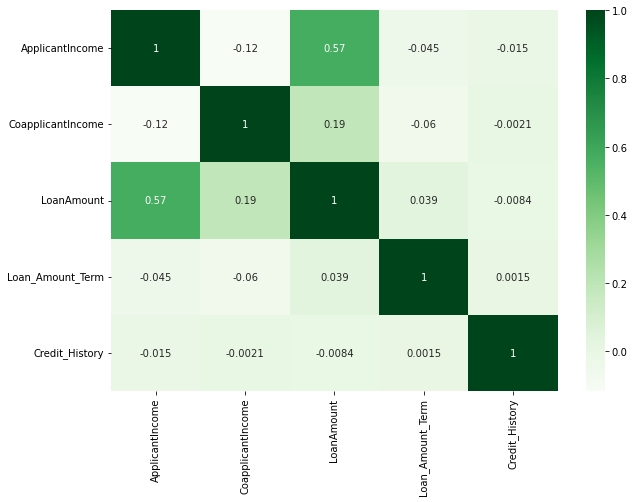

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,cmap='Greens')

### 2.12 Building persona

#### 2.12.1 Applicant majorty

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CoapplicantIncome_log', 'LoanAmount_log', 'logincome',
       'ApplicantIncome_log'],
      dtype='object')

In [ ]:
married=len(df[df.Married == 'Yes'])/len(df.Married)
notmarried=len(df[df.Married == 'No'])/len(df.Married)

In [ ]:
print(married)
print(notmarried)

0.6482084690553745
0.3469055374592834


In [ ]:
female=len(df[df.Gender == 'Female'])/len(df.Gender)
male=len(df[df.Gender == 'Male'])/len(df.Gender)
female

0.18241042345276873

In [ ]:
male

0.7964169381107492

In [ ]:
graduate=len(df[df.Education == 'Graduate'])/len(df.Education)
not_graduate=len(df[df.Education == 'Not Graduate'])/len(df.Education)
graduate

0.7817589576547231

In [ ]:
not_graduate

0.2182410423452769

In [ ]:
self_emp=len(df[df.Self_Employed == 'Yes'])/len(df.Self_Employed)
not_self_emp=len(df[df.Self_Employed == 'No'])/len(df.Self_Employed)
self_emp

0.13355048859934854

In [ ]:
not_self_emp

0.8143322475570033

In [ ]:
credit_hist=len(df[df.Credit_History == 1.0])/len(df.Credit_History)
bad_credit_hist=len(df[df.Credit_History == 0.0])/len(df.Credit_History)
credit_hist

0.7736156351791531

In [ ]:
bad_credit_hist

0.1449511400651466

In [ ]:
semiurban=len(df[df.Property_Area == 'Semiurban'])/len(df.Property_Area)
urban=len(df[df.Property_Area == 'Urban'])/len(df.Property_Area)
rural=len(df[df.Property_Area == 'Rural'])/len(df.Property_Area)
rural

0.2915309446254072

In [ ]:
semiurban

0.3794788273615635

In [ ]:
urban

0.3289902280130293

#### 2.12.2 Loan approved customer

In [ ]:
df_approved.drop('Loan_ID',axis=1,inplace =True)

/var/folders/46/dbkcnsnj0mj32m5rwc64xzcr0000gn/T/ipykernel_51218/3001984241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_approved.drop('Loan_ID',axis=1,inplace =True)


In [ ]:
df_approved

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [ ]:
married=len(df_approved[df_approved.Married == 'Yes'])/len(df[df.Married == 'Yes'])
notmarried=len(df_approved[df_approved.Married == 'No'])/len(df[df.Married == 'No'])

In [ ]:
married

0.7160804020100503

In [ ]:
notmarried

0.6291079812206573

In [ ]:
female=len(df_approved[df_approved.Gender == 'Female'])/len(df[df.Gender == 'Female'])
male=len(df_approved[df_approved.Gender == 'Male'])/len(df[df.Gender == 'Male'])

In [ ]:
df_approved.Gender.value_counts()

Male      339
Female     75
Name: Gender, dtype: int64

In [ ]:
female

0.6696428571428571

In [ ]:
male

0.6932515337423313

In [ ]:
graduate=len(df_approved[df_approved.Education == 'Graduate'])/len(df[df.Education == 'Graduate'])
not_graduate=len(df_approved[df_approved.Education == 'Not Graduate'])/len(df[df.Education == 'Not Graduate'])

In [ ]:
graduate

0.7083333333333334

In [ ]:
not_graduate

0.6119402985074627

In [ ]:
self_emp=len(df_approved[df_approved.Self_Employed == 'Yes'])/len(df[df.Self_Employed == 'Yes'])
not_self_emp=len(df_approved[df_approved.Self_Employed == 'No'])/len(df[df.Self_Employed == 'No'])

In [ ]:
self_emp

0.6829268292682927

In [ ]:
not_self_emp

0.686

In [ ]:
credit_hist=len(df_approved[df_approved.Credit_History == 1.0])/len(df[df.Credit_History == 1.0])
bad_credit_hist=len(df_approved[df_approved.Credit_History == 0.0])/len(df[df.Credit_History == 0.0])

In [ ]:
credit_hist

0.7957894736842105

In [ ]:
bad_credit_hist

0.07865168539325842

In [ ]:
semiurban=len(df_approved[df_approved.Property_Area == 'Semiurban'])/len(df[df.Property_Area == 'Semiurban'])
urban=len(df_approved[df_approved.Property_Area == 'Urban'])/len(df[df.Property_Area == 'Urban'])
rural=len(df_approved[df_approved.Property_Area == 'Rural'])/len(df[df.Property_Area == 'Rural'])
rural

0.6145251396648045

In [ ]:
semiurban

0.7682403433476395

In [ ]:
urban

0.6584158415841584

In [51]:
df_approved.groupby(['Married','Gender'])['Loan_Status'].count()

Married  Gender
No       Female     51
         Male       81
Yes      Female     23
         Male      256
Name: Loan_Status, dtype: int64

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### 3.1 Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df['Gender']=df['Gender'].fillna(lambda x: random.choice('Male','Female'))

In [ ]:
df[['Self_Employed','Dependents']]=df[['Self_Employed','Dependents']].fillna(0)

In [ ]:
df['Credit_History']=df['Credit_History'].fillna(1)

In [ ]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360)

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['Married']=df['Married'].fillna('No')

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.Dependents=df.Dependents.astype('str')

In [ ]:
df.Credit_History=df.Credit_History.astype('str')

### 3.2 Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [23]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

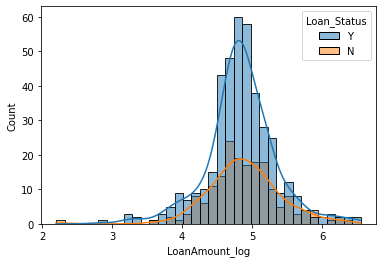

In [24]:
sns.histplot(x='LoanAmount_log',hue='Loan_Status',data=df,kde=True)

Combine both incomes as total income and take a log transformation of the same.

In [25]:
income = df['ApplicantIncome']+df['CoapplicantIncome']
df['logincome']=np.log10(income)

<AxesSubplot:xlabel='logincome', ylabel='Count'>

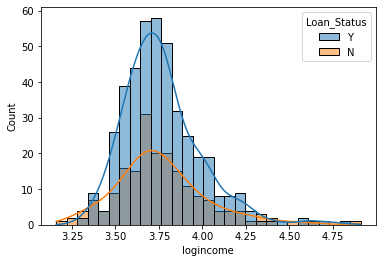

In [26]:
sns.histplot(x='logincome',hue='Loan_Status',data=df,kde=True)

In [27]:
df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome'])
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])

/Users/oliviahan/opt/anaconda3/envs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

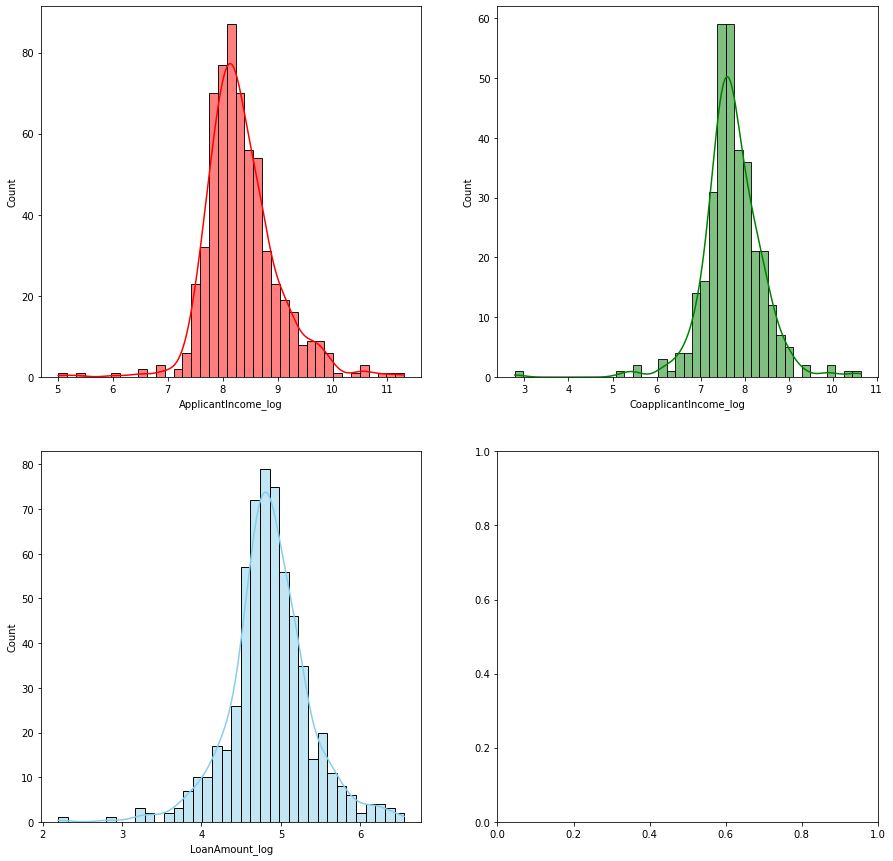

In [30]:
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(15,15))

sns.histplot(data=df, x="ApplicantIncome_log",kde=True, ax=axs[0, 0],color='red')
sns.histplot(data=df, x="CoapplicantIncome_log",kde=True, ax=axs[0, 1],color='green')
sns.histplot(data=df, x="LoanAmount_log",kde=True, ax=axs[1, 0],color='skyblue')

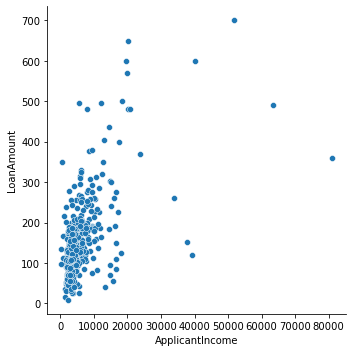

In [41]:
df_loan=df[['ApplicantIncome','LoanAmount']]
sns.relplot(x='ApplicantIncome',y='LoanAmount',data=df_loan)

## 4. Building a Predictive Model

## 5. Using Pipeline

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.ensemble import RandomForestClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import SelectKBest # Feature selector
from sklearn.pipeline import Pipeline,make_pipeline # For setting up pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
#oversampling
from sklearn.model_selection import GridSearchCV 

In [ ]:
dff=pd.read_csv('data.csv')

In [ ]:
dff.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
X=dff.drop('Loan_Status',axis=1)

In [ ]:
y=dff['Loan_Status']

In [ ]:
X.Credit_History=X.Credit_History.astype('str')

In [ ]:
cat_feats=X.dtypes[X.dtypes == 'object'].index.tolist()
num_feats=X.dtypes[~X.dtypes.index.isin(cat_feats)].index.tolist()

In [ ]:
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [ ]:
num_feats

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=0)

In [ ]:
#oversampling for implanced data
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer



In [ ]:
def log_transform(x):
    return np.log(x+1)

In [ ]:
# we will start two separate pipelines for each type of features
log_trans = FunctionTransformer(log_transform)


In [ ]:
basemodel=RandomForestClassifier()

In [ ]:
numeric_transform=Pipeline(steps=[
                            ('imputer',SimpleImputer(strategy='mean')),
                            ('numeric',log_trans),
                            ('scale',StandardScaler()),
])

In [ ]:
cat_transform=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                        ('onehotencoded',OneHotEncoder(handle_unknown='ignore',sparse=False))    
])

In [ ]:
preprocess=ColumnTransformer(transformers=[
    ('num',numeric_transform,num_feats),
    ('cat',cat_transform,cat_feats)  
])

In [ ]:

pipeline=Pipeline(steps=[
                         ("preprocessor",preprocess),
                         ("clf",basemodel)])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('numeric',
                                                                   FunctionTransformer(func=<function log_transform at 0x7fae05774280>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoded',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('clf', RandomForestClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.8097560975609757

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'clf': [SVC(), RandomForestClassifier(),
                        XGBClassifier(),
                        KNeighborsClassifier()]}

In [ ]:
grid=GridSearchCV(pipeline,param_grid=param_grid,cv=5)

In [ ]:
grid.fit(X_train,y_train)

/Users/oliviahan/opt/anaconda3/envs/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliviahan/opt/anaconda3/envs/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliviahan/opt/anaconda3/envs/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliviahan/opt/anaconda3/envs/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:00:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliviahan/opt/anaconda3/envs/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('numeric',
                                                                                          FunctionTransformer(func=<function log_transform at 0x7fae05774280>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('im...
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None,
                                               reg_alpha=None, reg_lambda=None,
                                               scale_pos_weight=None,
                                               subsample=None, tree_method=None,
                                               validate_parameters=None,
                                               verbosity=None),
                                 KNeighborsClassifier()]})

In [ ]:
grid.best_params_

{'clf': SVC()}

In [ ]:
grid.score(X_test,y_test)

0.8146341463414634

In [ ]:
# parms={'clf':[SVC(probability=True)],
#        'clf__gamma':['scale','auto'],
#        'clf__degree':[3,6,9],
#        'clf__C':[1,10,100],
#        'clf__kernel':['linear','rbf']   
# }


# parms={'clf':[RandomForestClassifier(probability=True)],
#        'clf__gamma':['scale','auto'],
#        'clf__degree':[3,6,9],
#        'clf__C':[1,10,100],
#        'clf__kernel':['linear','rbf']   
# }

parms = { 
    'clf':[RandomForestClassifier()],
    'clf__n_estimators': [150,200],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__max_depth' : [4,5],
    'clf__criterion' :['entropy']
}

In [ ]:
grid=GridSearchCV(pipeline,param_grid=parms,cv=5,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END clf=RandomForestClassifier(), clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__n_estimators=150; total time=   0.5s
[CV] END clf=RandomForestClassifier(), clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__n_estimators=150; total time=   0.2s
[CV] END clf=RandomForestClassifier(), clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__n_estimators=150; total time=   0.2s
[CV] END clf=RandomForestClassifier(), clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__n_estimators=150; total time=   0.2s
[CV] END clf=RandomForestClassifier(), clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__n_estimators=150; total time=   0.3s
[CV] END clf=RandomForestClassifier(), clf__criterion=entropy, clf__max_depth=4, clf__max_features=sqrt, clf__n_estimators=200; total time=   0.3s
[CV] END clf=RandomForestClassifier(), clf__criterion=entr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('numeric',
                                                                                          FunctionTransformer(func=<function log_transform at 0x7fae05774280>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('im...
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Property_Area'])])),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf': [RandomForestClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        max_features='log2',
                                                        n_estimators=150)],
                         'clf__criterion': ['entropy'],
                         'clf__max_depth': [4, 5],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__n_estimators': [150, 200]},
             verbose=2)

In [ ]:
grid.best_params_

{'clf': RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                        n_estimators=150),
 'clf__criterion': 'entropy',
 'clf__max_depth': 4,
 'clf__max_features': 'log2',
 'clf__n_estimators': 150}

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
grid.score(X_test,y_test)

0.8195121951219512

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 25,  35],
       [  2, 143]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        60
           1       0.80      0.99      0.89       145

    accuracy                           0.82       205
   macro avg       0.86      0.70      0.73       205
weighted avg       0.84      0.82      0.79       205



In [ ]:
print(metrics.roc_auc_score(y_test, y_pred))

0.7014367816091953


In [ ]:
y_prob=grid.predict_proba(X_test)

/Users/oliviahan/opt/anaconda3/envs/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


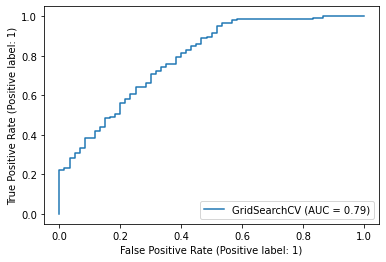

In [ ]:
metrics.plot_roc_curve(grid,X_test,y_test)

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

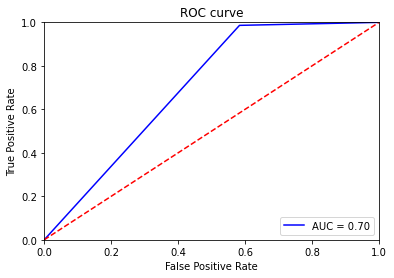

In [ ]:
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
import pickle

In [ ]:
pickle.dump(grid,open("model.pickle","wb"))

In [ ]:
# http://10.0.0.148:5000/

In [ ]:
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
dtype: object

In [ ]:

json_data = {
    "Gender": "Female",
    "Married": "No",
    "Dependents": "0",
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 6000,
    "CoapplicantIncome": 0.0,
    "LoanAmount": 300.0,
    "Loan_Amount_Term": 360.0,
    "Credit_History": "1.0",
    "Property_Area": "Semiurban"
}


In [ ]:
#  http://172.31.11.221:5555/

In [61]:
# print(r.json())


In [ ]:
import requests
URL = 'http://10.0.0.148:5555/scoring'
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 
print(r.json())

[1]
